# traditional liquor recommend system modeling practice

In [10]:
import numpy as np
import pandas as pd
import csv
import re
import matplotlib.pyplot as plt
import seaborn as sns

from ast import literal_eval  # 문자열 파싱 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer

In [11]:
df = pd.read_csv("./Traditional_liquor_df_final.csv")
df

,Unnamed: 0,index,제품명,단맛,신맛,청량감,바디감,도수%,탄산,주종,keyword,용량,가격,제조사,원재료
0,0,0,1000억막걸리프리바이오,3.0,4.0,3.0,3,5.0,0.0,탁주,단맛 신맛 청량감 바디감 탁주 쌀 밀,750ml,3500,(주)국순당,"쌀,밀,누룩,정제수"
1,1,1,1000억유산균막걸리,3.0,5.0,5.0,3,5.0,0.0,탁주,단맛 신맛 청량감 바디감 탁주 쌀 밀 저도수,750ml,3200,(주)국순당,"쌀,밀,누룩,정제수"
2,2,2,1932새싹땅콩햅쌀막걸리,2.0,2.0,3.0,5,6.0,0.0,탁주,청량감 바디감 탁주 쌀 땅콩,900ml,15000,(주)1932포천일동막걸리,"쌀,땅콩농축액,입국,효모,고과당,정제효소제,정제수"
3,3,3,1932새싹땅콩흑미막걸리,3.0,1.0,1.0,4,6.0,0.0,탁주,단맛 바디감 탁주 쌀 땅콩,900ml,15000,(주)1932포천일동막걸리,"쌀,흑미,땅콩농축액,입국,효모,고과당,정제효소제,정제수"
4,4,4,33JU,3.0,NaN,NaN,1,18.0,0.0,증류주,향기 단맛 증류주 꿀 삼,200ml,23000,농업회사법인33가주식회사,"산양산삼,주정,결정과당,효소처리스테비아,에리스리톨,호박산,꿀"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,528,528,회곡생동동주,3.0,2.0,3.0,3,7.0,0.0,탁주,단맛 청량감 바디감 탁주 쌀,"1,200ml",1300,회곡양조장,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨"
529,529,529,회곡생막걸리,2.0,2.0,2.0,4,6.0,0.0,탁주,바디감 탁주 쌀,750ml,1300,회곡양조장,"쌀,입국,누룩,아스파탐,효모,정제수,아세설팜칼륨"
530,530,530,흑돈주,NaN,NaN,NaN,2,16.0,0.0,기타주류,목넘김 기타주류,365ml,12000,왕지케양조장(제주본초협동조합),"황칠나무,정제수,,효모"
531,531,531,희양산막걸리15,3.0,4.0,1.0,5,15.0,0.0,탁주,단맛 신맛 바디감 탁주 쌀 무감미료,500ml,9500,두술도가,"쌀,누룩,정제수"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  533 non-null    int64  
 1   index       533 non-null    int64  
 2   제품명         533 non-null    object 
 3   단맛          463 non-null    float64
 4   신맛          408 non-null    float64
 5   청량감         387 non-null    float64
 6   바디감         533 non-null    int64  
 7   도수%         533 non-null    float64
 8   탄산          533 non-null    float64
 9   주종          533 non-null    object 
 10  keyword     533 non-null    object 
 11  용량          533 non-null    object 
 12  가격          533 non-null    object 
 13  제조사         533 non-null    object 
 14  원재료         533 non-null    object 
dtypes: float64(5), int64(3), object(7)
memory usage: 62.6+ KB


## 결측치 처리

### 결측치를 평균값으로 대체

In [13]:
df1 = df[['단맛', '신맛', '청량감', '바디감','도수%']]
df1.head(15)
df2 = df[['단맛', '신맛', '청량감', '바디감']]
df2.head(15)

,단맛,신맛,청량감,바디감
0,3.0,4.0,3.0,3
1,3.0,5.0,5.0,3
2,2.0,2.0,3.0,5
3,3.0,1.0,1.0,4
4,3.0,NaN,NaN,1
5,3.0,NaN,NaN,2
6,2.0,NaN,NaN,3
7,2.0,2.0,2.0,3
8,4.0,2.0,3.0,2
9,3.0,3.0,3.0,3


In [14]:
dfm = df1.fillna(df.mean())
dfm.head(15)

c:\Users\X1Carbon\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,단맛,신맛,청량감,바디감,도수%
0,3.0,4.000000,3.000000,3,5.0
1,3.0,5.000000,5.000000,3,5.0
2,2.0,2.000000,3.000000,5,6.0
3,3.0,1.000000,1.000000,4,6.0
4,3.0,2.318627,2.271318,1,18.0
5,3.0,2.318627,2.271318,2,17.5
6,2.0,2.318627,2.271318,3,25.0
7,2.0,2.000000,2.000000,3,12.0
8,4.0,2.000000,3.000000,2,16.0
9,3.0,3.000000,3.000000,3,6.0


### 결측치를 knn알고리즘으로 처리

In [15]:
imputer = KNNImputer(n_neighbors=5)
dfk = pd.DataFrame(imputer.fit_transform(df1))
dfk.head(15)

,0,1,2,3,4
0,3.0,4.0,3.0,3.0,5.0
1,3.0,5.0,5.0,3.0,5.0
2,2.0,2.0,3.0,5.0,6.0
3,3.0,1.0,1.0,4.0,6.0
4,3.0,2.2,2.0,1.0,18.0
5,3.0,2.4,2.2,2.0,17.5
6,2.0,0.6,1.8,3.0,25.0
7,2.0,2.0,2.0,3.0,12.0
8,4.0,2.0,3.0,2.0,16.0
9,3.0,3.0,3.0,3.0,6.0


In [16]:
dfk.columns = [['단맛', '신맛', '청량감', '바디감', '도수']]
dfk[:20]

,단맛,신맛,청량감,바디감,도수
0,3.0,4.0,3.0,3.0,5.0
1,3.0,5.0,5.0,3.0,5.0
2,2.0,2.0,3.0,5.0,6.0
3,3.0,1.0,1.0,4.0,6.0
4,3.0,2.2,2.0,1.0,18.0
5,3.0,2.4,2.2,2.0,17.5
6,2.0,0.6,1.8,3.0,25.0
7,2.0,2.0,2.0,3.0,12.0
8,4.0,2.0,3.0,2.0,16.0
9,3.0,3.0,3.0,3.0,6.0


In [17]:
# 일단 knn 알고리즘 쓴걸로 적용하기로..

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

item_sim = cosine_similarity(dfk,dfk)

In [10]:
# 시각화를 위한 차원 축소
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(dfk)

print(pca_transformed.shape)
pca_transformed

(533, 2)


array([[ 1.62642888,  0.11033698],
       [ 3.65322378,  0.17892676],
       [-0.19248944,  0.2365409 ],
       ...,
       [ 0.6378771 ,  0.61526186],
       [ 0.17393628,  0.40282338],
       [ 0.11782177, -0.726857  ]])

In [11]:
dfk['pca_x'] = pca_transformed[:, 0]
dfk['pca_y'] = pca_transformed[:, 1]
dfk.head(3)

,단맛,신맛,청량감,바디감,pca_x,pca_y
0,3.0,4.0,3.0,3.0,1.626429,0.110337
1,3.0,5.0,5.0,3.0,3.653224,0.178927
2,2.0,2.0,3.0,5.0,-0.192489,0.236541


In [12]:
# Kmeans로 클러스터링!

In [13]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(dfk)

KMeans(n_clusters=3, random_state=0)

In [14]:
print(kmeans.labels_)

[1 1 0 0 1 1 2 2 1 1 1 2 1 1 0 1 2 1 1 1 1 0 0 1 2 1 0 1 0 2 2 1 1 1 2 1 1
 1 1 0 0 0 0 2 0 1 0 1 1 1 2 1 2 0 1 0 1 2 2 2 2 0 0 0 2 1 1 1 1 2 2 2 0 2
 0 1 0 0 1 1 1 2 2 2 0 0 0 1 0 2 2 2 2 2 1 2 1 0 1 0 0 2 2 2 2 1 2 2 1 1 1
 1 2 1 1 2 1 0 1 2 0 1 2 1 0 1 0 0 1 1 2 2 2 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1
 0 1 1 1 0 0 0 2 2 2 2 2 0 1 1 2 1 2 0 1 2 2 1 0 0 2 2 2 2 0 0 0 2 1 1 0 0
 0 2 0 0 1 1 1 1 2 1 2 1 2 0 0 2 1 1 1 0 1 0 2 0 2 0 1 0 2 2 1 1 1 2 2 0 0
 0 0 0 1 1 1 0 2 2 2 0 1 1 2 0 0 0 1 1 1 2 2 1 1 1 1 2 1 1 2 1 2 1 1 0 0 2
 0 0 2 2 0 0 2 2 1 2 2 2 2 2 1 2 0 2 0 0 1 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 0 0 1 2 1 1 1 1 1 1 1 1 0 1 1 1 2 2 2 1 1 2 0 2 1 1 1 2 0 1 2 2 0
 2 1 0 1 1 0 2 0 0 2 2 0 1 1 2 1 2 1 1 0 0 0 1 1 0 1 1 2 1 0 1 1 1 2 2 0 0
 1 2 0 1 1 1 2 2 2 2 0 2 2 2 2 1 1 1 1 0 1 1 1 1 1 2 1 0 0 2 0 1 2 2 1 1 1
 2 2 1 2 0 0 0 1 1 1 1 2 2 0 1 2 1 0 2 1 0 1 0 0 2 2 1 1 0 1 1 2 1 2 0 1 1
 0 2 2 2 1 2 1 0 0 0 0 1 2 1 0 1 1 2 0 2 1 0 2 0 0 2 0 0 1 1 0 2 2 2 1 1 1
 1 2 2 0 0 0 0 0 0 1 1 0 

In [15]:
dfk['cluster'] = kmeans.labels_

In [16]:
dfk

,단맛,신맛,청량감,바디감,pca_x,pca_y,cluster
0,3.0,4.0,3.0,3.0,1.626429,0.110337,1
1,3.0,5.0,5.0,3.0,3.653224,0.178927,1
2,2.0,2.0,3.0,5.0,-0.192489,0.236541,0
3,3.0,1.0,1.0,4.0,-2.011226,0.790312,0
4,3.0,1.5,3.0,1.0,-0.086680,0.090077,1
...,...,...,...,...,...,...,...
528,3.0,2.0,3.0,3.0,0.108020,0.564758,1
529,2.0,2.0,2.0,4.0,-0.733834,-0.205503,2
530,3.5,2.5,3.0,2.0,0.637877,0.615262,1
531,3.0,4.0,1.0,5.0,0.173936,0.402823,1


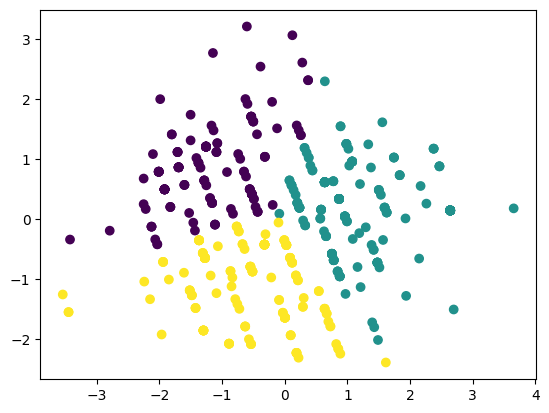

In [17]:
plt.scatter(x=dfk.loc[:, 'pca_x'], y=dfk.loc[:, 'pca_y'], c=dfk['cluster'])

In [3]:
### 차원을 1로 축소해 rank -> 그와 유사한 애들 뽑아내기

In [18]:
dfk1 = pd.DataFrame()
dfk1['index'] = df['index']
dfk1[['단맛','바디감']] = dfk[['단맛','바디감']]
dfk1

,index,단맛,바디감
0,0,3.0,3.0
1,1,3.0,3.0
2,2,2.0,5.0
3,3,3.0,4.0
4,4,3.0,1.0
...,...,...,...
528,528,3.0,3.0
529,529,2.0,4.0
530,530,3.5,2.0
531,531,3.0,5.0


In [19]:
pca = PCA(n_components=1)
pca_transformed = pca.fit_transform(dfk)

print(pca_transformed.shape)
pca_transformed

(533, 1)


array([[ 2.27583132],
       [ 5.11864649],
       [-0.38876808],
       [-2.98743684],
       [-0.12824928],
       [ 0.80267286],
       [-0.32533826],
       [-0.76492389],
       [ 0.35103246],
       [ 1.19135869],
       [ 1.25431327],
       [ 0.11424737],
       [ 1.34490918],
       [ 1.19135869],
       [-0.93319703],
       [ 3.69723891],
       [-1.05095903],
       [ 1.15166258],
       [ 2.36642723],
       [ 0.84797082],
       [ 0.26043654],
       [-2.54785121],
       [-2.54785121],
       [ 3.69723891],
       [-1.79764565],
       [ 2.27583132],
       [-1.96031694],
       [ 2.13348453],
       [-2.54785121],
       [-2.51206271],
       [-0.32533826],
       [ 3.69723891],
       [ 0.84797082],
       [ 3.69723891],
       [-0.32533826],
       [ 0.31218742],
       [ 1.43550509],
       [ 1.25431327],
       [ 1.43550509],
       [-2.25061237],
       [-1.71957976],
       [-1.71957976],
       [-0.92199332],
       [-0.6113734 ],
       [-0.92199332],
       [ 0

In [20]:
dfk1['pca'] = pca_transformed[:]
dfk1

,index,단맛,바디감,pca
0,0,3.0,3.0,2.275831
1,1,3.0,3.0,5.118646
2,2,2.0,5.0,-0.388768
3,3,3.0,4.0,-2.987437
4,4,3.0,1.0,-0.128249
...,...,...,...,...
528,528,3.0,3.0,0.106886
529,529,2.0,4.0,-0.918474
530,530,3.5,2.0,0.847971
531,531,3.0,5.0,0.210388


In [22]:
dfk1.loc[:, 'pca_rank'] = dfk1.loc[:, 'pca'].rank(axis=0, method='first', ascending=True)
dfk1 = dfk1.sort_values(by=['pca_rank'], ascending=True, ignore_index=False, inplace=False)
dfk1[:30]

,index,단맛,바디감,pca,pca_rank
362,362,2.0,3.0,-4.888126,1.0
418,418,1.0,3.0,-4.782808,2.0
180,180,1.0,2.0,-4.629257,3.0
419,419,1.0,2.0,-4.629257,4.0
179,179,2.0,3.0,-4.008955,5.0
277,277,4.0,1.0,-3.315361,6.0
368,368,2.0,4.0,-3.283334,7.0
380,380,2.0,5.0,-3.231583,8.0
160,160,3.0,5.0,-3.140987,9.0
74,74,2.0,4.0,-3.078033,10.0


In [ ]:
# KNN 으로 결측치 채워서 cosine similarity 

In [50]:
dfk

,단맛,신맛,청량감,바디감,도수
0,3.0,4.0,3.0,3.0,5.0
1,3.0,5.0,5.0,3.0,5.0
2,2.0,2.0,3.0,5.0,6.0
3,3.0,1.0,1.0,4.0,6.0
4,3.0,2.2,2.0,1.0,18.0
...,...,...,...,...,...
528,3.0,2.0,3.0,3.0,7.0
529,2.0,2.0,2.0,4.0,6.0
530,2.4,2.6,1.4,2.0,16.0
531,3.0,4.0,1.0,5.0,15.0


In [52]:
dfk['index'] = dfk.index
dfk

,단맛,신맛,청량감,바디감,도수,index
0,3.0,4.0,3.0,3.0,5.0,0
1,3.0,5.0,5.0,3.0,5.0,1
2,2.0,2.0,3.0,5.0,6.0,2
3,3.0,1.0,1.0,4.0,6.0,3
4,3.0,2.2,2.0,1.0,18.0,4
...,...,...,...,...,...,...
528,3.0,2.0,3.0,3.0,7.0,528
529,2.0,2.0,2.0,4.0,6.0,529
530,2.4,2.6,1.4,2.0,16.0,530
531,3.0,4.0,1.0,5.0,15.0,531


In [ ]:
dfk.to_csv("fillna_knn.csv",index = False)

In [11]:
df_for_cossim_T = dfk.transpose()
from sklearn.metrics.pairwise import cosine_similarity
item_sim = cosine_similarity(dfk, dfk)
item_sim_df = pd.DataFrame(data=item_sim, index=df_for_cossim_T.columns, columns=df_for_cossim_T.columns)
print(item_sim_df.shape)
item_sim_df.head(3)

(533, 533)


,0,1,2,3,4,5,6,7,8,9,...,523,524,525,526,527,528,529,530,531,532
0,1.000000,0.980841,0.933700,0.886142,0.764967,0.792571,0.707600,0.840221,0.820341,0.986117,...,0.799071,0.714169,0.672147,0.835175,0.789058,0.949071,0.939826,0.789058,0.861337,0.914425
1,0.980841,1.000000,0.892329,0.796926,0.688839,0.716546,0.622257,0.766903,0.750265,0.953206,...,0.717209,0.633632,0.586604,0.746248,0.708516,0.904291,0.881409,0.708516,0.773973,0.852090
2,0.933700,0.892329,1.000000,0.955778,0.791300,0.825434,0.784955,0.890291,0.845878,0.960769,...,0.821468,0.776017,0.749723,0.876182,0.821489,0.962102,0.990742,0.821489,0.899647,0.930421


In [90]:
item_sim_df[16].sort_values(ascending=False)[0:6]

16     1.000000
43     0.999555
508    0.999197
321    0.999197
373    0.999197
274    0.998980
Name: 16, dtype: float64

In [91]:
df_for_cossim_T2 = dfk2.transpose()
from sklearn.metrics.pairwise import cosine_similarity
item_sim = cosine_similarity(dfk2, dfk2)
item_sim_df2 = pd.DataFrame(data=item_sim, index=df_for_cossim_T2.columns, columns=df_for_cossim_T2.columns)
print(item_sim_df2.shape)
item_sim_df2.head(3)

(533, 533)


,0,1,2,3,4,5,6,7,8,9,...,523,524,525,526,527,528,529,530,531,532
0,1.000000,0.980138,0.894180,0.821754,0.893203,0.975518,0.964615,0.965060,0.929131,0.991241,...,0.964581,0.964581,0.993819,0.922146,0.964581,0.958634,0.922225,0.964581,0.918225,0.986945
1,0.980138,1.000000,0.860753,0.723478,0.907581,0.969673,0.943116,0.926198,0.907731,0.970143,...,0.950699,0.950699,0.996096,0.834441,0.950699,0.936555,0.870864,0.950699,0.832064,0.951303
2,0.894180,0.860753,1.000000,0.920566,0.769881,0.870938,0.976031,0.976481,0.832684,0.925820,...,0.852279,0.852279,0.879883,0.900885,0.852279,0.942266,0.991460,0.852279,0.907485,0.938103


In [92]:
item_sim_df[16].sort_values(ascending=False)[0:6]

16     1.000000
43     0.999555
508    0.999197
321    0.999197
373    0.999197
274    0.998980
Name: 16, dtype: float64

In [93]:
print(df[16:17], df[43:44], df[321:322], df[35:36], df[56:57], df[396:397])

    Unnamed: 0  index 제품명   단맛   신맛  청량감  바디감   도수%   탄산     주종  \
16          16     16  감사  2.0  2.0  NaN    2  14.0  0.0  약주/청주   

                      keyword     용량     가격 제조사       원재료  
16       목넘김 담백   약주/청주 쌀  선물  375ml  15000  술샘  쌀,누룩,정제수       Unnamed: 0  index           제품명   단맛   신맛  청량감  바디감   도수%   탄산   주종  \
43          43     43  고창선운산땡큐블루베리주  2.0  2.0  2.0    2  13.0  0.0  과실주   

                 keyword     용량    가격             제조사                   원재료  
43           과실주 베리  소용량  300ml  2000  농업회사법인고창선운산(유)  블루베리과실,주정,효모,구연산,정제수        Unnamed: 0  index        제품명   단맛   신맛  청량감  바디감   도수%   탄산   주종  \
321         321    321  여포의꿈레드드라이  2.0  2.0  NaN    2  12.0  0.0  과실주   

                    keyword     용량     가격     제조사    원재료  
321         탄닌감  과실주 포도  선물  750ml  20000  여포와인농장  국내산포도       Unnamed: 0  index         제품명   단맛   신맛  청량감  바디감   도수%   탄산   주종  \
35          35     35  고도리레드와인스위트  3.0  3.0  2.0    3  12.0  0.0  과실주   

                        ke

In [96]:
# null값있는 상태로 코사인 유사도 측정 -> 불가능~~~!

df_for_cossim_T1 = df1.transpose()
from sklearn.metrics.pairwise import cosine_similarity
item_sim1 = cosine_similarity(df1, df1)
item_sim_df1 = pd.DataFrame(data=item_sim1, index=df_for_cossim_T1.columns, columns=df_for_cossim_T1.columns)
print(item_sim_df1.shape)
item_sim_df1.head(5)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
## dfk 활용 -> 단맛, 바디감 input 으로 받아서 return

In [26]:
dfk

,단맛,신맛,청량감,바디감,도수
0,3.0,4.0,3.0,3.0,5.0
1,3.0,5.0,5.0,3.0,5.0
2,2.0,2.0,3.0,5.0,6.0
3,3.0,1.0,1.0,4.0,6.0
4,3.0,2.2,2.0,1.0,18.0
...,...,...,...,...,...
528,3.0,2.0,3.0,3.0,7.0
529,2.0,2.0,2.0,4.0,6.0
530,2.4,2.6,1.4,2.0,16.0
531,3.0,4.0,1.0,5.0,15.0


In [27]:
dan = float(input("단맛 : "))
bb = float(input("바디감 : "))

In [49]:
dfk.loc[dfk['단맛'] == dan]

ValueError: Cannot index with multidimensional key

In [41]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   (단맛,)   533 non-null    float64
 1   (신맛,)   533 non-null    float64
 2   (청량감,)  533 non-null    float64
 3   (바디감,)  533 non-null    float64
 4   (도수,)   533 non-null    float64
dtypes: float64(5)
memory usage: 20.9 KB


In [ ]:
# CountVectorizer demo
from ast import literal_eval  # 문자열 파싱 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=0, ngram_range=(1, 2))  
# min_df: 단어장에 들어갈 최소빈도, ngram_range: 1 <= n <= 2
key_mat = count_vect.fit_transform(dff['keyword'])

print(key_mat.shape)
print(key_mat)
count_vect2 = CountVectorizer(min_df=1, ngram_range=(1, 3))  # min_df: 단어장에 들어갈 최소빈도, ngram_range: 1 <= n <= 2
key_mat2 = count_vect2.fit_transform(dff['keyword'])
print(key_mat2.shape)
print(key_mat2)
from sklearn.metrics.pairwise import cosine_similarity
key_sim = cosine_similarity(key_mat, key_mat)

print(key_sim.shape)
print(key_sim[:10])
# 대칭 행렬
key_sim_sorted_ind = key_sim.argsort()[:, ::-1] # ::-1 : 역순으로 정렬
print(key_sim_sorted_ind[:5])
title_sool = dff[dff['제품명'] == '오희스파클링막걸리']
title_sool
sool_index = title_sool.index.values
sool_index
similar_indexes = key_sim_sorted_ind[sool_index, :10]
similar_indexes
# 추출된 top_n index들 출력. top_n index는 2차원 데이터 임.
# dataframe에서 index로 사용하기 위해서 2차원 array를 1차원 array로 변경
similar_indexes = similar_indexes.reshape(-1)
print(similar_indexes)
dff.iloc[similar_indexes]